In [48]:
# imports necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
%matplotlib inline
from pylab import mpl, plt

In [2]:
# creating variable for file path

path = '../data/'

In [4]:
# using pandas to import csv file

spy_df = pd.read_csv(path+'SPY.csv')

In [50]:
# drops na values along both axis, sums total na values.

spy_df.dropna(axis=0, how='all', inplace=True)
spy_df.dropna(axis=1, how='any', inplace=True)
spy_df.isna().sum().sum()

0

In [9]:
# sets Date to index column 

spy_df.set_index('Date', inplace=True)

In [10]:
# creates a copy of the spy DataFrames close column 

eod_df = spy_df[['Close']].copy()

In [11]:
# changes the column name from close to price indcating cost involved if position entered. 

eod_df.rename(columns={'Close' : 'price'}, inplace=True)

In [13]:
eod_df['SMA_fast'] = eod_df['price'].rolling(20).mean()

In [14]:
eod_df['SMA_slow'] = eod_df['price'].rolling(200).mean()

In [17]:
plt.style.use('seaborn')
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['font.family'] = 'serif'

<AxesSubplot:title={'center':'SPY | 20 & 200 days SMAs'}, xlabel='Date'>

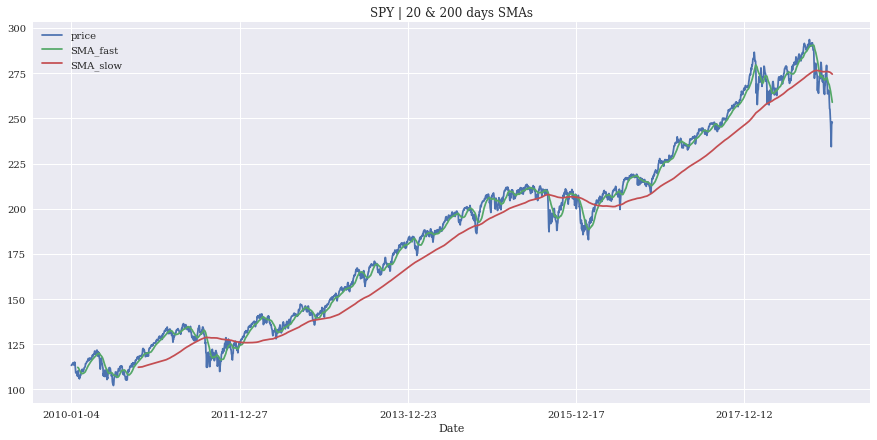

In [18]:
eod_df.plot(title='SPY | 20 & 200 days SMAs', figsize=(15,7))

In [19]:
eod_df['position'] = np.where(eod_df['SMA_fast'] > eod_df['SMA_slow'],
                             1, -1)

In [20]:
eod_df.dropna(inplace=True)

<AxesSubplot:title={'center':'Market Positioning'}, xlabel='Date'>

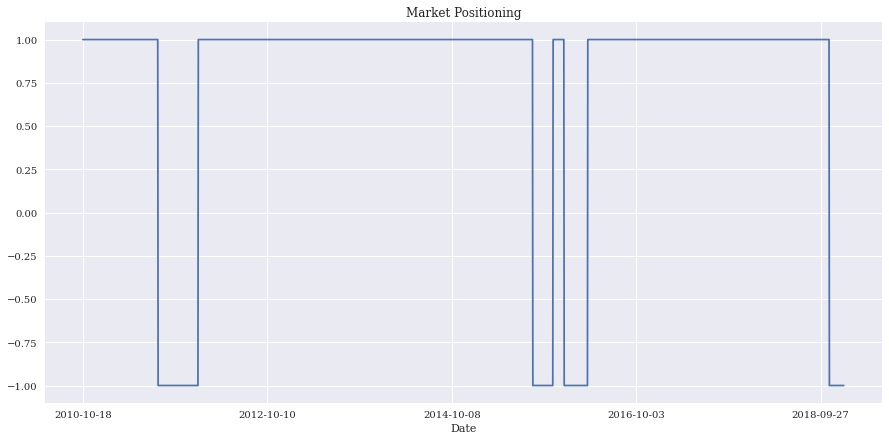

In [21]:
eod_df['position'].plot(ylim=[-1.1, 1.1],
                       title="Market Positioning",
                       figsize=(15,7))

In [25]:
eod_df['returns'] = np.log(eod_df['price'] / eod_df['price'].shift(1))

<AxesSubplot:>

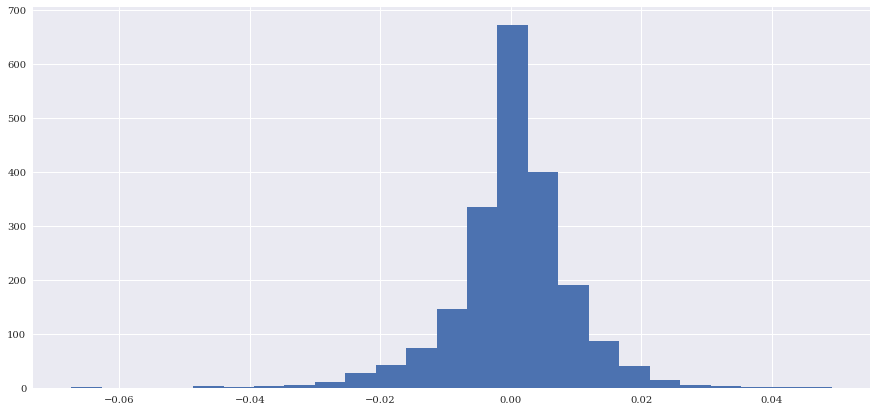

In [26]:
eod_df['returns'].hist(bins=25, figsize=(15,7))

In [27]:
eod_df['strategy'] = eod_df['position'].shift(1) * eod_df['returns']

In [28]:
eod_df[['returns', 'strategy']].sum()

returns     0.739365
strategy    0.548505
dtype: float64

In [29]:
eod_df[['returns', 'strategy']].sum().apply(np.exp)

returns     2.094606
strategy    1.730663
dtype: float64

<AxesSubplot:xlabel='Date'>

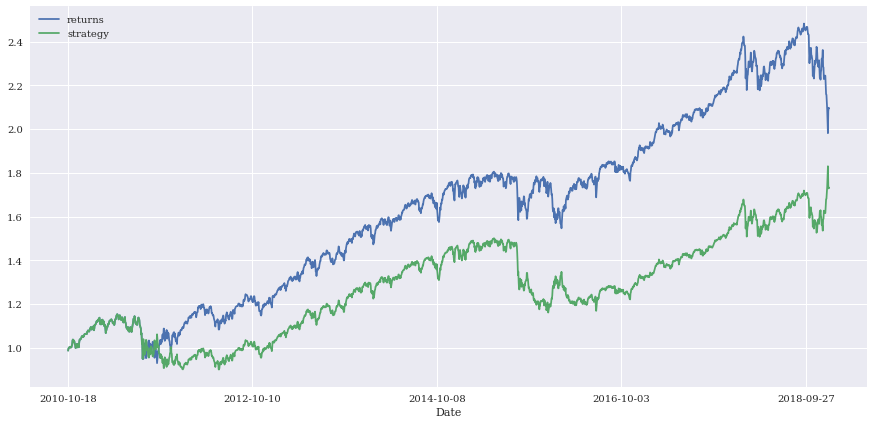

In [30]:
eod_df[['returns', 'strategy']].cumsum().apply(np.exp).plot(figsize=(15,7))

In [32]:
eod_df[['returns', 'strategy']].mean() * 252

returns     0.090315
strategy    0.067001
dtype: float64

In [33]:
np.exp(eod_df[['returns', 'strategy']].mean() * 252) -1

returns     0.094519
strategy    0.069297
dtype: float64

In [39]:
eod_df[['returns', 'strategy']].std() * 252 ** 0.5

returns     0.145278
strategy    0.145328
dtype: float64

In [41]:
(eod_df[['returns', 'strategy']].apply(np.exp) - 1).std() * 252 ** 0.5

returns     0.144997
strategy    0.145011
dtype: float64

In [42]:
eod_df['cumret'] = eod_df['strategy'].cumsum().apply(np.exp) 

In [43]:
eod_df['cummax'] = eod_df['cumret'].cummax()

<AxesSubplot:xlabel='Date'>

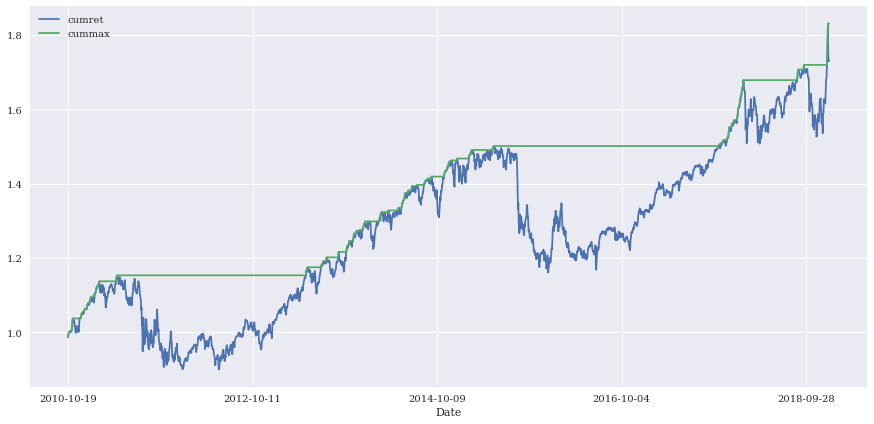

In [47]:
eod_df[['cumret', 'cummax']].dropna().plot(figsize=(15,7))